1. Implement the intensity transformation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Load the grayscale image

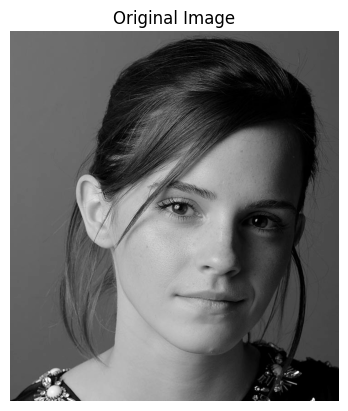

In [6]:
image_path = "a1images/emma.jpg"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis
plt.show()

 lookup table for an intensity transformation

In [8]:
t1 = np.linspace(0, 50, 50).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

lookup_table = np.concatenate([t1, t2, t3])

visually represents the lookup table

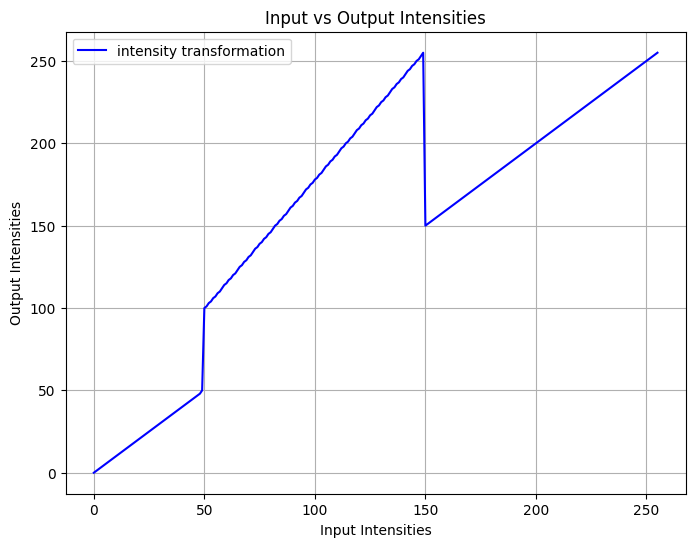

In [9]:
#input intensities
input_intensities = np.arange(256)

#plot input and output intensities
plt.figure(figsize=(8,6))
plt.plot(input_intensities, lookup_table, color='blue', label="intensity transformation")
plt.title('Input vs Output Intensities')
plt.xlabel('Input Intensities')
plt.ylabel('Output Intensities')
plt.grid(True)
plt.legend()
plt.show()

Appy Transformation

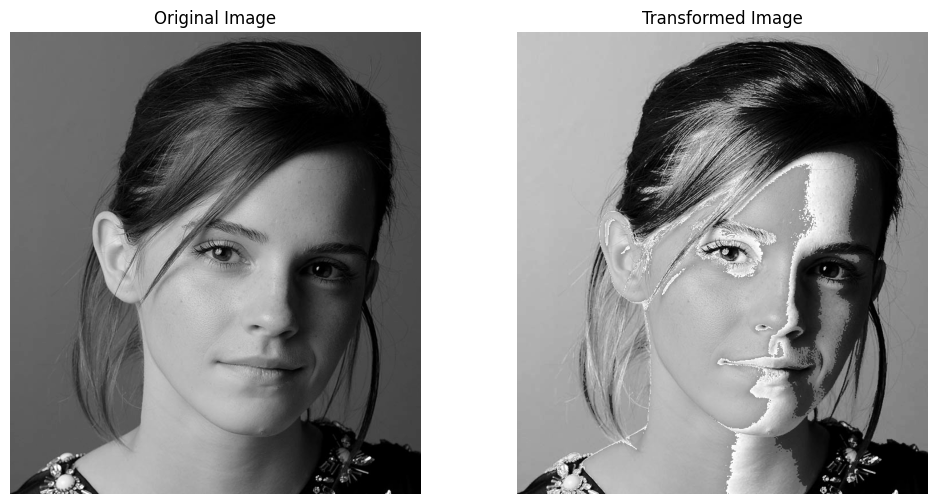

In [10]:
image_transformed = cv.LUT(image, lookup_table)

# Display original and transformed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

2.Accentuate white and grey matter

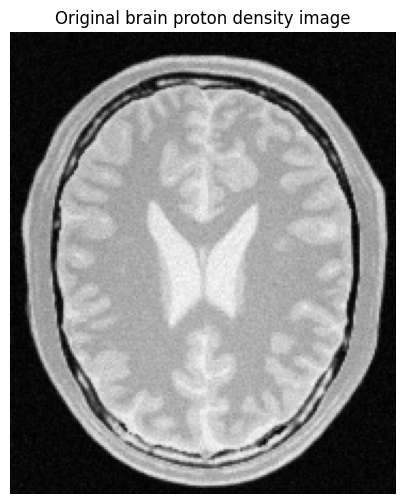

In [12]:
image_path_2 = "a1images/brain_proton_density_slice.png"
brain_image = cv.imread(image_path_2, cv.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(brain_image, cmap='gray')
plt.title('Original brain proton density image')
plt.axis('off')  # Hide axis
plt.show()

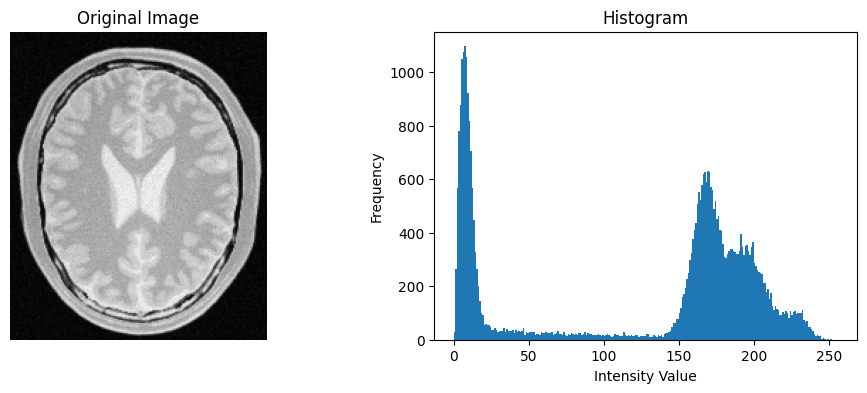

In [ ]:
# Display histogram of the original image
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(brain_image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].hist(brain_image.ravel(), 256, [0, 256])
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

Typical Intensity Characteristics in PD Images:

White Matter (WM): Usually has lower proton density, so it appears darker than grey matter.

Grey Matter (GM): Has a higher proton density than white matter, so it appears brighter than white matter.

Cerebrospinal Fluid (CSF): Has the highest proton density, so it appears brightest.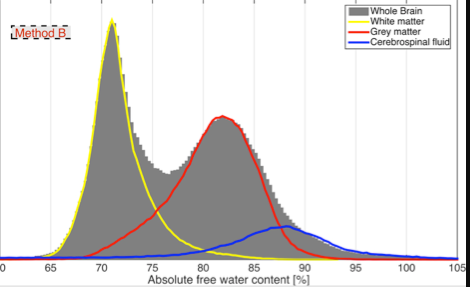

In histogram we can see,          
          
A big peak for background (dark intensities near 0).

A medium peak for white matter (lower-mid intensities).

A brighter peak for grey matter.

Possibly a small peak at high intensities for CSF or bright artifacts.

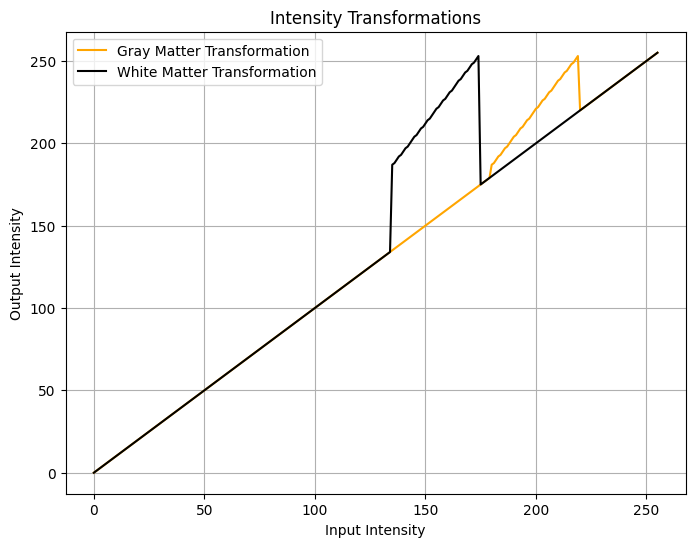

In [48]:
# plot intensity transformation of white and gray matter on same plot
input_intensity = np.arange(256)
output_intensity_gray = np.copy(input_intensity)
output_intensity_gray[180:220] = 1.7 * output_intensity_gray[180:220] - 119

output_intensity_white = np.copy(input_intensity)
output_intensity_white[135:175] = 1.7 * output_intensity_white[135:175] -42.5

plt.figure(figsize=(8, 6))
plt.plot(input_intensity, output_intensity_gray, label='Gray Matter Transformation', color='orange')
plt.plot(input_intensity, output_intensity_white, label='White Matter Transformation', color='black')

plt.title('Intensity Transformations')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()
plt.show()

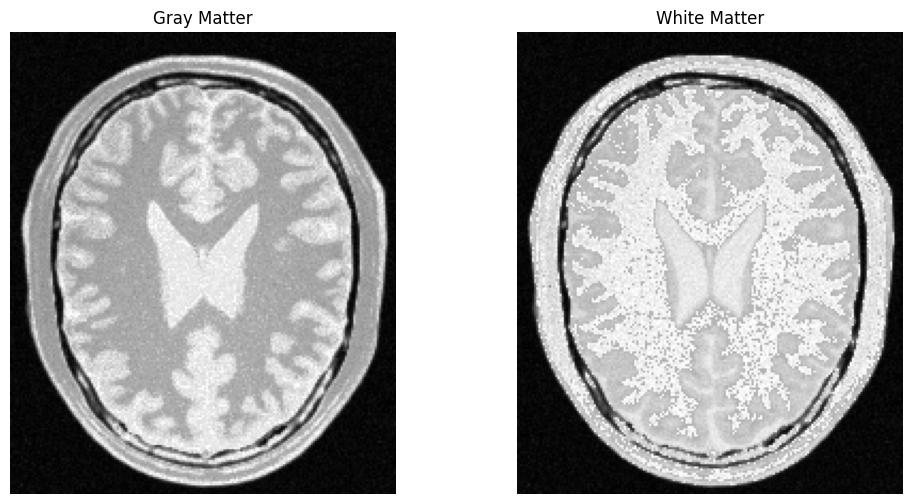

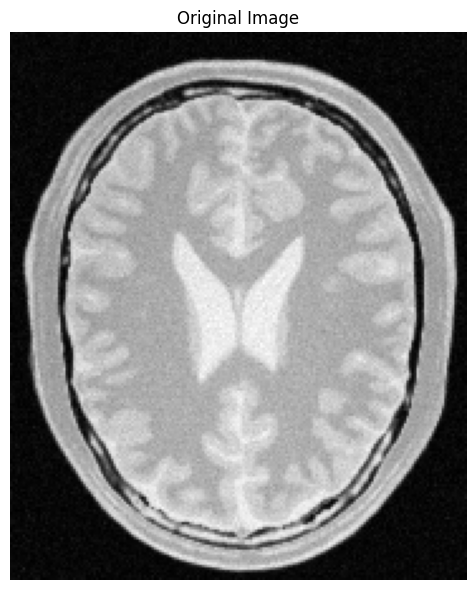

In [52]:
def accentuate_matter(image):
    # Create a copy of image
    image_accentuated_grey = np.copy(image)

    #Apply transformation for gray matter 150 to 180
    gray_matter_mask = (image >= 180) & (image <= 220)
    image_accentuated_grey[gray_matter_mask] = 1.7 * image_accentuated_grey[gray_matter_mask] - 119

    image_accentuated_white = np.copy(image)
    # Apply transformation for white matter 100 to 250
    white_matter_mask = (image >= 135) & (image <= 175)
    image_accentuated_white[white_matter_mask] = 1.7 * image_accentuated_white[white_matter_mask] - 42.5

    return image_accentuated_grey, image_accentuated_white

# Apply the accentuation transformation
image_accentuated_grey, image_accentuated_white = accentuate_matter(brain_image)

# Display the masks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_accentuated_grey, cmap='gray')
plt.title("Gray Matter")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_accentuated_white, cmap='gray')
plt.title("White Matter")
plt.axis('off')

# Display the original and transformed images side by side
plt.figure(figsize=(6, 6))
plt.imshow(brain_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()